<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Syllable Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [5]:
# the following line enable interact with figures,  
# you can make zoom and save images from a poup matplotlib window
# to select points: qt ipympl tk. To just visualize: notebook
%matplotlib ipympl

import birdsongs as bs
from birdsongs.util import *

Define directories path and show audio files

In [43]:
#audios = "..\\..\\audios\\"
root    = "../examples/" # "path\\to\\repository\\' 
audios  = 'audios'       # "path\\to\\audios\\'
results = "results"      # "path\\to\\results\\'

paths  = bs.Paths(root, audios, results, catalog=False)      # root_path, audios_path, catalog
ploter = bs.Ploter(save=True)   # to save figures save=True 
paths.ShowFiles(True)#[['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Altitude']].head()


The folder has 907 songs:


['102333.wav',
 '10470.wav',
 '10477.wav',
 '104944841.wav',
 '11051.wav',
 '11065.wav',
 '112724.wav',
 '114873.wav',
 '117968.wav',
 '119539571.wav',
 '119540231.wav',
 '121169931.wav',
 '121169981.wav',
 '122506451.wav',
 '122506581.wav',
 '122507731.wav',
 '122507951.wav',
 '123049301.wav',
 '125950071.wav',
 '126245901.wav',
 '126823891.wav',
 '127740621.wav',
 '130234001.wav',
 '130489831.wav',
 '130491881.wav',
 '130492151.wav',
 '131428041.wav',
 '132780.wav',
 '13335.wav',
 '13366.wav',
 '13368.wav',
 '135309.wav',
 '135616641.wav',
 '138656.wav',
 '138662.wav',
 '139500421.wav',
 '140704.wav',
 '140710.wav',
 '140730.wav',
 '141624341.wav',
 '141626551.wav',
 '143383.wav',
 '147216.wav',
 '147273.wav',
 '147710.wav',
 '147895.wav',
 '148143.wav',
 '148552511.wav',
 '152537921.wav',
 '15620.wav',
 '15621.wav',
 '15622.wav',
 '15623.wav',
 '15624.wav',
 '15625.wav',
 '15626.wav',
 '15628.wav',
 '158294421.wav',
 '161442521.wav',
 '162865061.wav',
 '165580221.wav',
 '165581281.w

Dealing with several audio files and csv metadata

In [35]:
#selected = paths.AudioFiles(False)[(paths.AudioFiles(False)['Country'] == 'Brazil')][['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]
#selected = selected[(paths.AudioFiles(False)['State'] != 'Lima')]#[['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]
#selected#["State"]#.iloc[0]["ML Catalog Number"]
#print(len(selected))

In [36]:
#paths.AudioFiles().loc[paths.AudioFiles()['Country'] == 'Argentina']

Define, visualize and hear birdsong. The same funcion allow to us select the time of interest enabling SelectTime_on option

In [42]:
s, fs = librosa.load(paths.sound_files[0], sr=None)
s

array([], dtype=float32)

In [37]:
birdsong = bs.BirdSong(paths, file_id="XC388622", tlim=(0,5),# dict=["Col", "DC"],
                       Nt=1000, NN=1024, flim=(1e2,15e3) 
                       )
print(birdsong.state, birdsong.country)
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)
AudioPlay(birdsong)

ValueError: zero-size array to reduction operation maximum which has no identity

In [10]:
time_interval = np.array([0.1315, 0.5782])
#time_interval = Positions(ploter.klicker)[0]
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Time interval selected: initial time 0.1315 s, final time 0.5782 s


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\birdsongs\ploter.py:165: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.8, wspace=0.4)


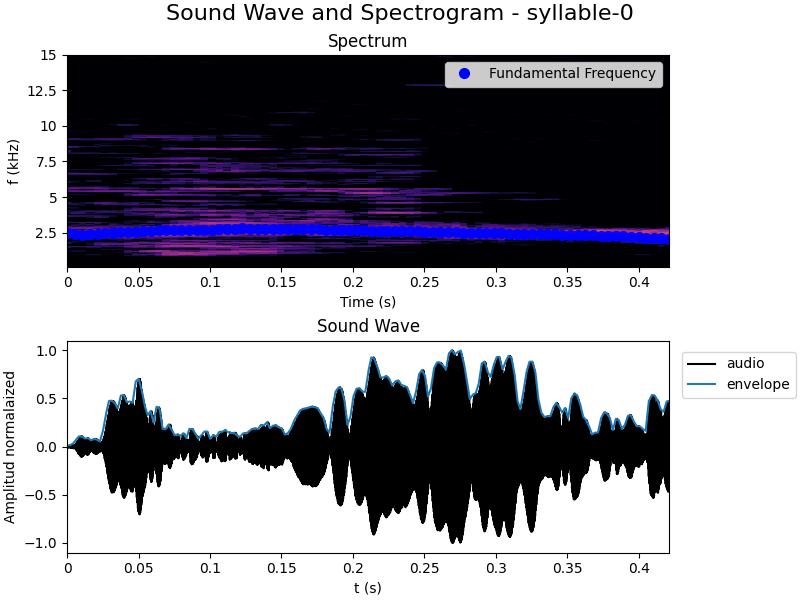

In [11]:
syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=1.05, no_syllable=0, type="intro-down")
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

In [12]:
# plt.figure(); plt.plot(syllable.FF, 'o'); plt.show(); plt.ylim((0, 3.5e4));
# syllable.FF

3D plot (in process)

In [13]:
#ploter.Plot3d(birdsong)

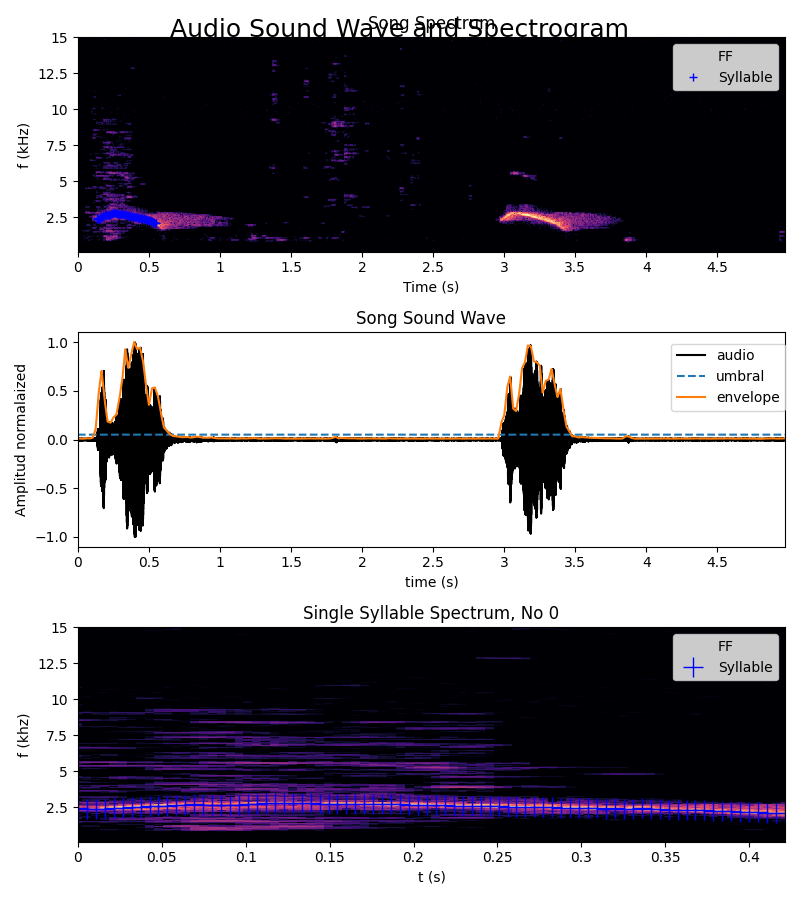

In [14]:
ploter.Plot(birdsong, FF_on=False, syllable=syllable)

Define syllable with the default syllable extractor

In [15]:
# no_syllable    = int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
# syllable       = birdsong.Syllable(no_syllable=3)
# ploter.Plot(syllable)
# AudioPlay(syllable)

In [16]:
# ploter.Plot(birdsong, FF_on=False, syllable_on=True, chunck_on=False)

# Optimal Synthetic Syllable

Define optimization method and its parameters 

In [17]:
brute     = {'method':'brute', 'Ns':21}  # , "workers":-1
optimizer = bs.Optimizer(syllable, method_kwargs=brute)
#?lmfit.minimize

Find optimal $\gamma$ for all the syllables computed by the syllables extractor. You can also just find the optimal for the single syllable

In [18]:
#optimal_gamma = optimizer.OptimalGamma(syllable)
optimal_gamma = 37000 # optimizer.AllGammas(birdsong)
syllable.p["gm"].set(value=optimal_gamma)

In [19]:
syllable.p

name,value,initial value,min,max,vary
a0,0.11000000,0.11,0.01000000,0.25000000,False
a1,0.00000000,0.0,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.00000000,2.00000000,False
b2,0.00000000,0.0,0.00000000,2.00000000,False
gm,37000.0000,40000.0,10000.0000,100000.000,False
f0,0.00000000,0,-1000.00000,1000.00000,False


Optimal $\alpha$ and $\beta$

In [16]:
#              [a0, a1, a2, b0, b1, b2]
#syllable.Set([0.154, 0, 0, -0.4, 1, 1.4])
# syllable.p["b2"].set(value=2)

In [32]:
optimizer.OptimalParams(syllable, Ns=6)

As
$a_0*$=0.1060, t=1.8281 min
Bs
$b_0*$=-0.1000,
b_2*=0.0000, t=9.3350 min
$b_1*$=1.2000, t=1.7355 min
end
Time of execution = 12.8987 minutes


if the fundamental frequency has a similar shape but is shifted vertically, run the following line code

In [20]:
syllable.p

name,value,initial value,min,max,vary
a0,0.11000000,0.11,0.01000000,0.25000000,False
a1,0.00000000,0.0,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.00000000,2.00000000,False
b2,0.00000000,0.0,0.00000000,2.00000000,False
gm,37000.0000,40000.0,10000.0000,100000.000,False
f0,0.00000000,0,-1000.00000,1000.00000,False


Display optimal parameters and generate a synthetic syllable 

In [23]:
syllable.p["a0"].set(value=0.1060)
syllable.p["b0"].set(value=-0.1)
syllable.p["b1"].set(value=1.2)
syllable.p["b2"].set(value=0)

In [18]:
# syllable.BirdData["L"] = 0.025
# syllable.BirdData["r"] = 0.65
# syllable.BirdData["MG"] = 20
# syllable.BirdData["RB"] = 5E6
# syllable.BirdData["Rh"] = 24E3
# syllable.BirdData["Ch"] = 1.43E-10
# # MG related to harmonics
syllable.BirdData

{'C': 343,
 'L': 0.025,
 'r': 0.65,
 'Ch': 1.43e-10,
 'MG': 20,
 'MB': 10000.0,
 'RB': 5000000.0,
 'Rh': 24000.0}

In [24]:
f0 = optimizer.OptimalF0(syllable)

$f_0*$=700.0000,
t=5.8941 min


In [25]:
Display(syllable.p)
synth_syllable = syllable.Solve(syllable.p)

name,value,initial value,min,max,vary
a0,0.10600000,0.11,0.01000000,0.25000000,False
a1,0.00000000,0.0,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.20000000,1,0.00000000,2.00000000,False
b2,0.00000000,0.0,0.00000000,2.00000000,False
gm,37000.0000,40000.0,10000.0000,100000.000,False
f0,700.000000,0,-1000.00000,1000.00000,False


Visualize and plot the synthetic syllable

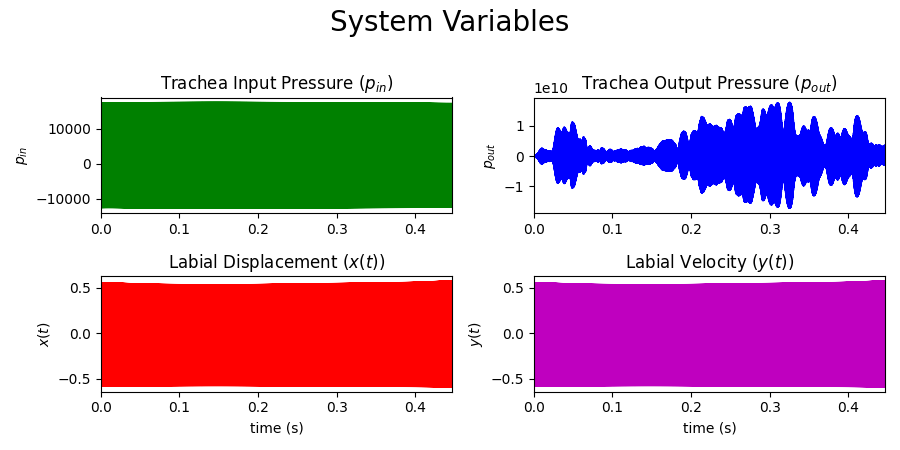

In [29]:
ploter.PlotVs(synth_syllable);

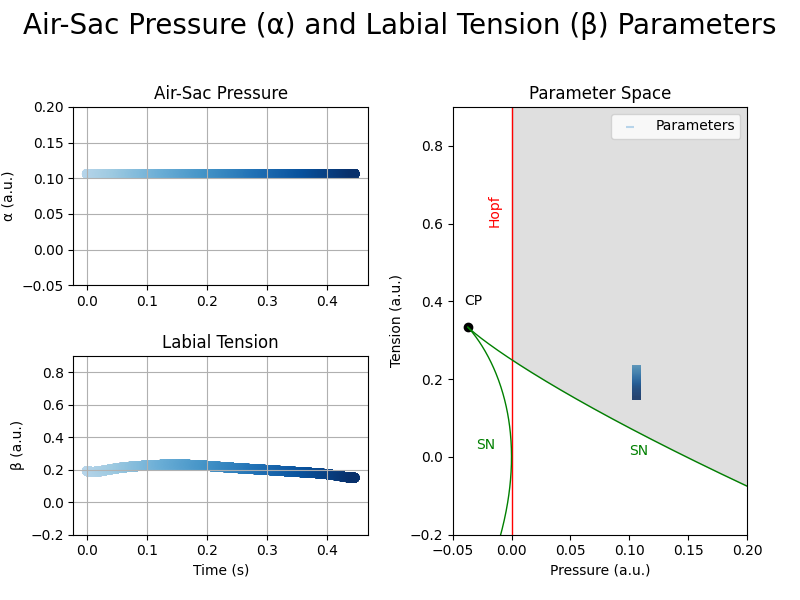

In [30]:
ploter.PlotAlphaBeta(synth_syllable);

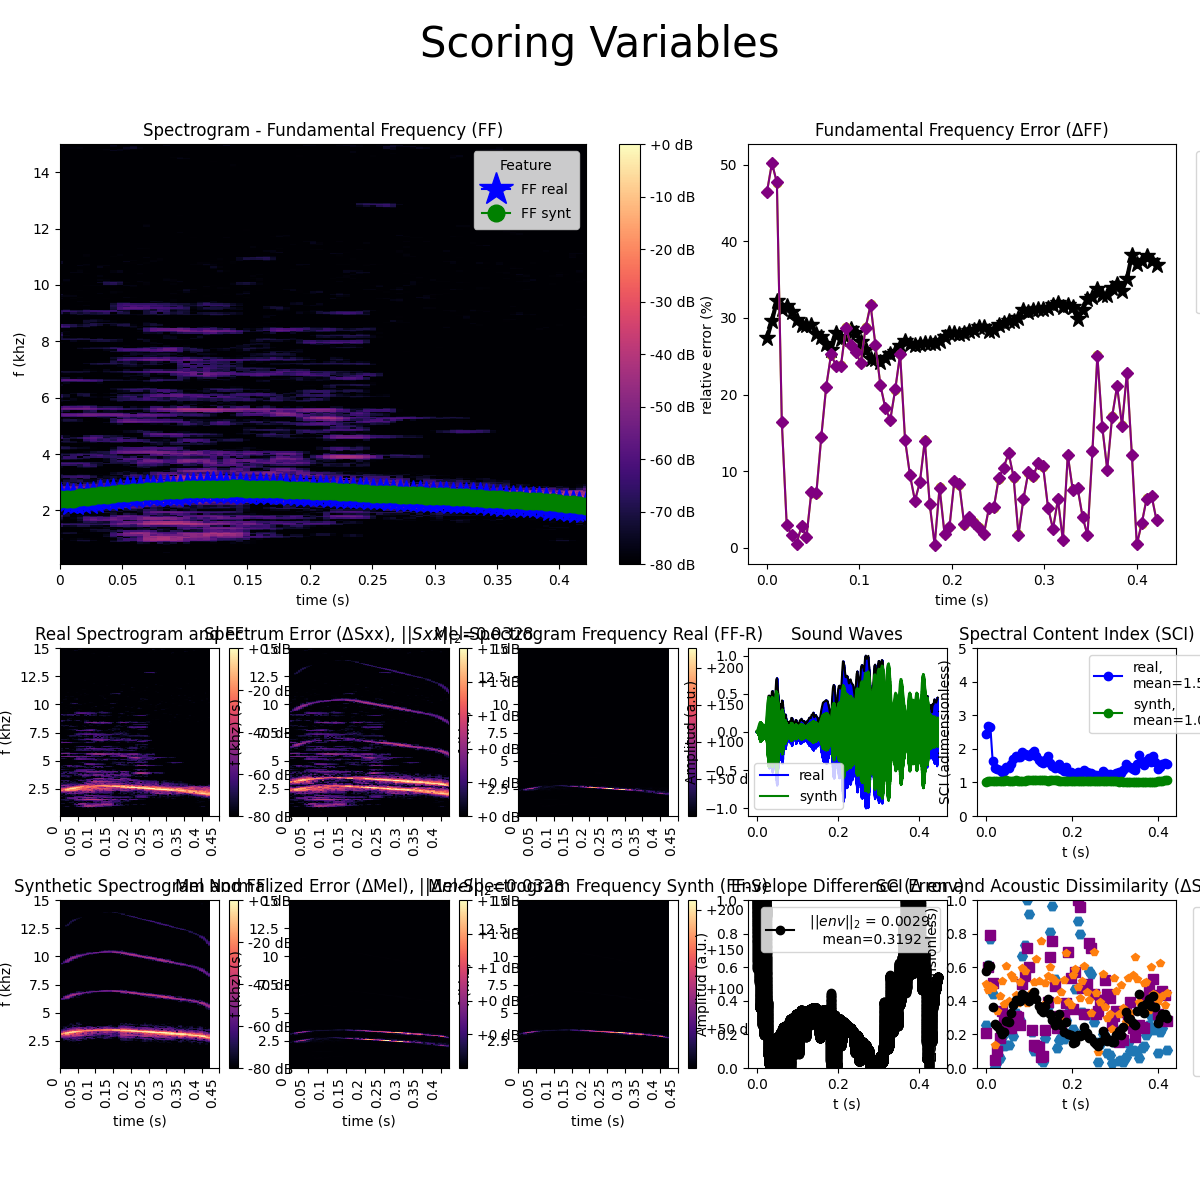

In [32]:
synth_syllable.freqs -= f0
synth_syllable.FF -= f0
ploter.Result(syllable, synth_syllable, figsize=(12,12));

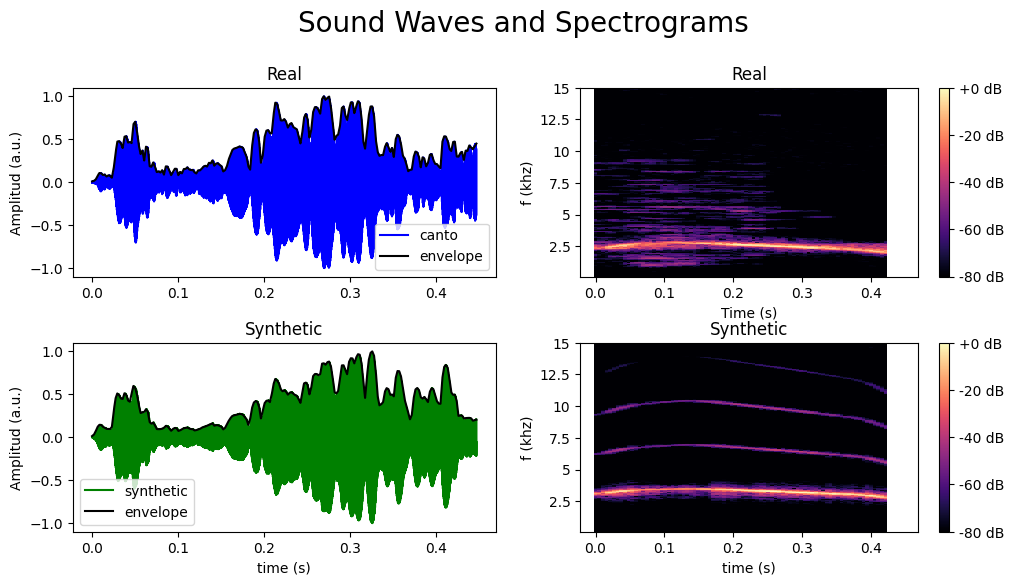

In [20]:
ploter.Syllables(syllable, synth_syllable);

In [79]:
AudioPlay(syllable)

In [ ]:
AudioPlay(synth_syllable)

Write synthetic and real syllables

In [ ]:
syllable.ExportMotorGestures()
syllable.WriteAudio();  synth_syllable.WriteAudio();